In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix as solve
from plots import plot_pairing_amplitude, plot_density_of_states

In [2]:
# recrod runtime
import timeit
start = timeit.default_timer()


system, F_matrix = solve() # NC(50) - SOC(2) - SC(50)
#mu_orbital = -3.5, orbital_indicator = 's', F_sc_initial_orbital = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Hermition:  True
Iteration nr. 1
delta_diff =  73.82626145074563
Iteration nr. 2
delta_diff =  0.024209582607093924
Iteration nr. 3
delta_diff =  4.519824949570507
Iteration nr. 4
delta_diff =  2.0813276910930436
Iteration nr. 5
delta_diff =  0.6384347701103485
Iteration nr. 6
delta_diff =  0.17420927716806753
Iteration nr. 7
delta_diff =  0.04597231111302128
Iteration nr. 8
delta_diff =  0.012003174874509645
Iteration nr. 9
delta_diff =  0.0031199829809465947
Iteration nr. 10
delta_diff =  0.0008088188324370718
Iteration nr. 11
delta_diff =  0.00020925632082900852
Iteration nr. 12
delta_diff =  5.4047808216294345e-05
Time:  135.8421299129841


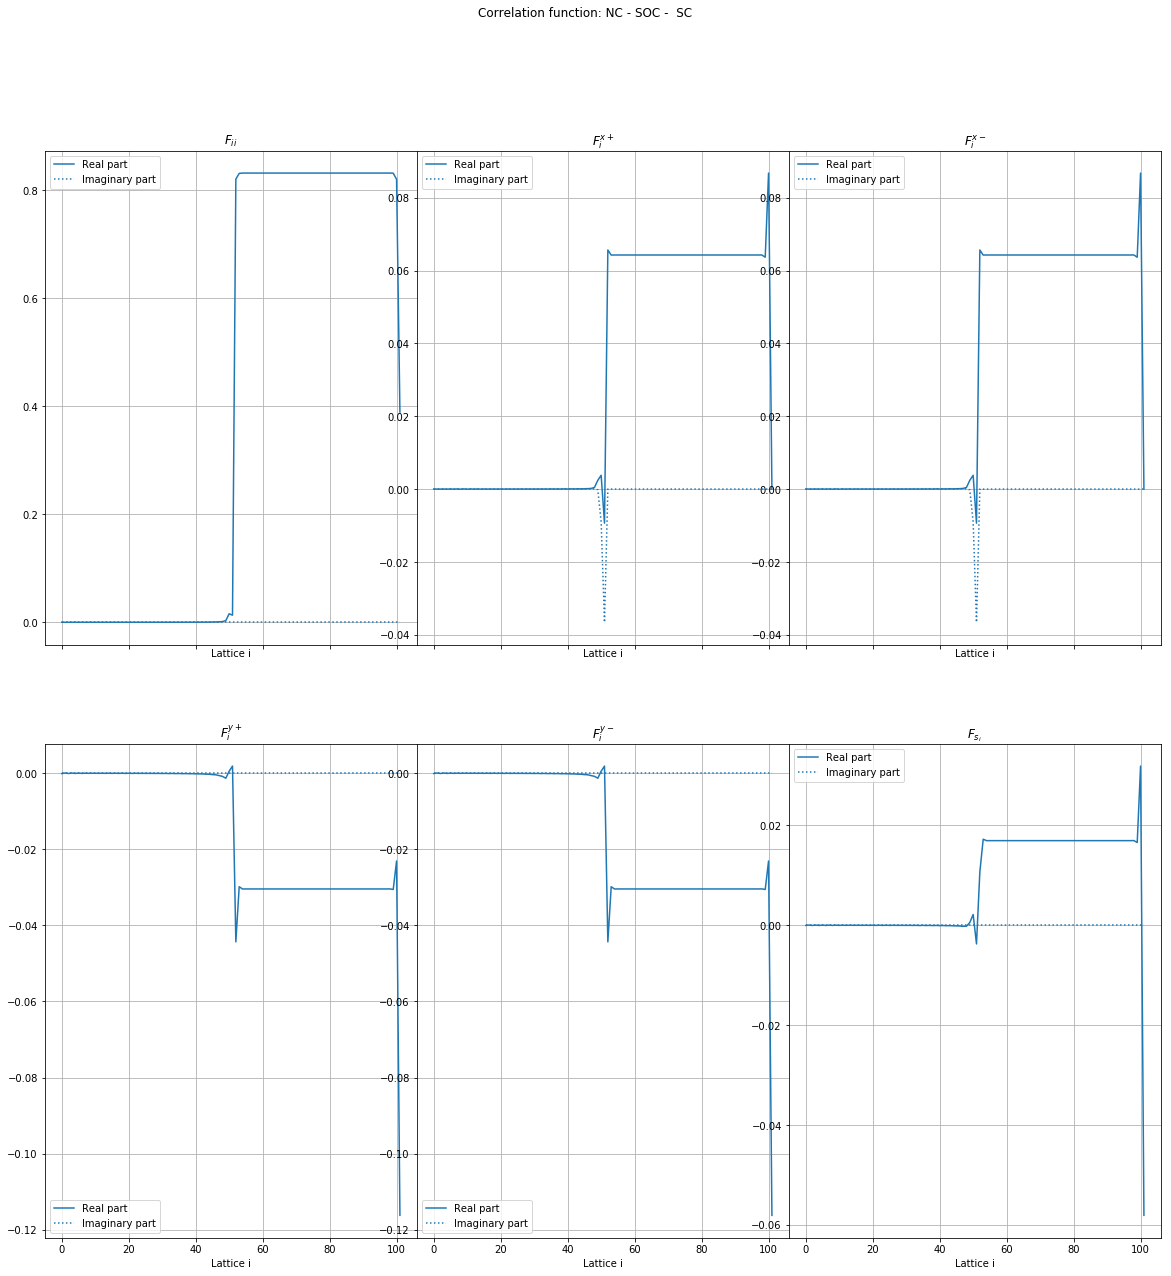

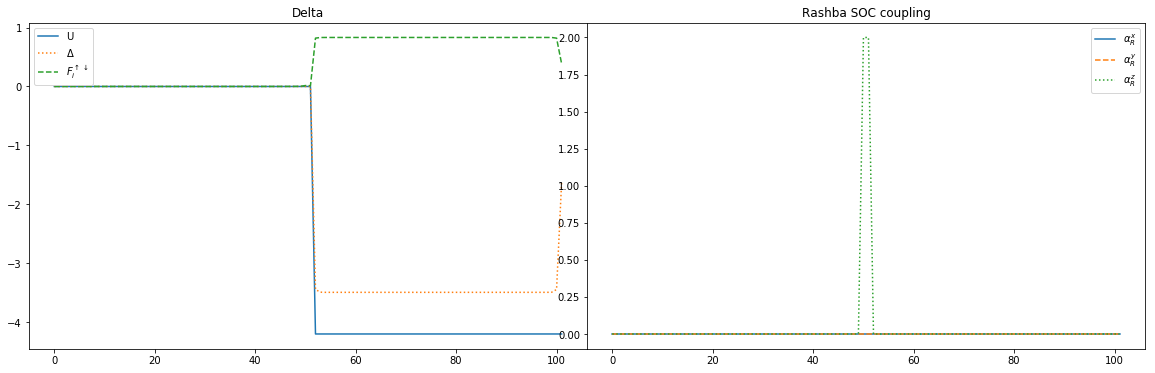

In [3]:
plot_pairing_amplitude(system, F_matrix) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

In [4]:
# recrod runtime
import timeit
start = timeit.default_timer()

ldos, energy_state = system.ldos_from_problem(0.01, 0.03, -6, 6) # resolution, krenerl size, min e, max e

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  58.44329971994739


In [5]:
print(ldos.shape)
print(energy_state.shape)

(102, 1200)
(1200,)


(1200,)
(102, 1200)


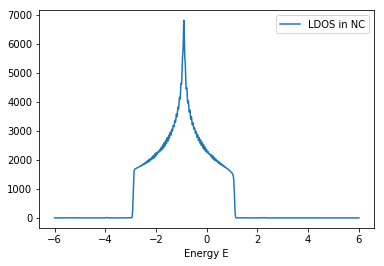

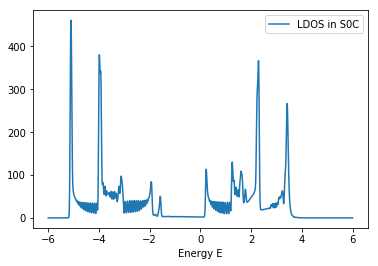

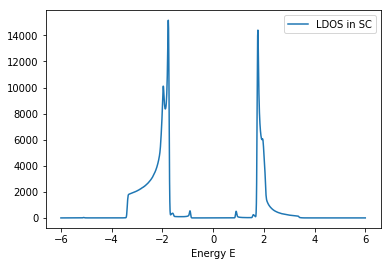

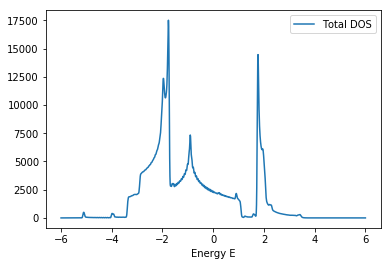

In [6]:
plot_density_of_states(energy_state, ldos)

Text(0,0.5,'#')

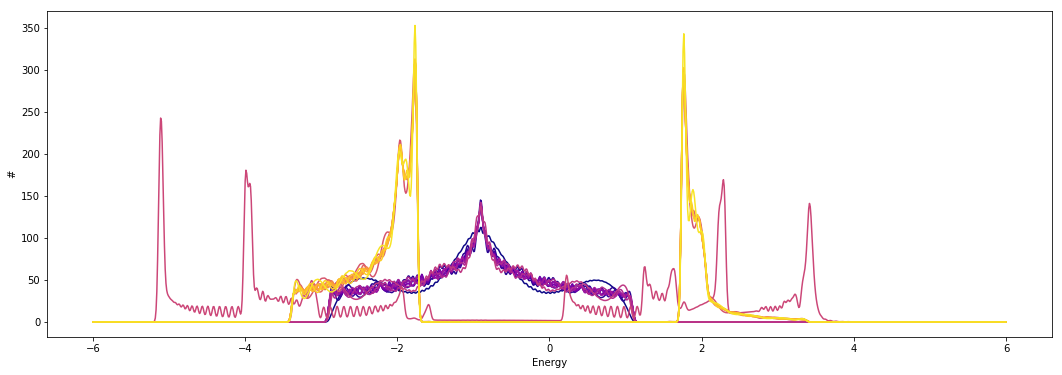

In [7]:
# Try to only plot middle lattice

fig, ax = plt.subplots(figsize=(18, 6))
num_latticesites = ldos.shape[0]
step = 5
delta_range = 50
start = max(num_latticesites//2-delta_range, 0)
stop = min(num_latticesites//2+delta_range, num_latticesites)
#stop = Nx//2
for i in range(start, stop, step):
    ax.plot(energy_state, ldos[i, :], c = cm.plasma(float(i-start)/(stop-start)))
#ax.set_xlim()
ax.set_xlabel("Energy")
ax.set_ylabel("#")

Text(0,0.5,'Energy')

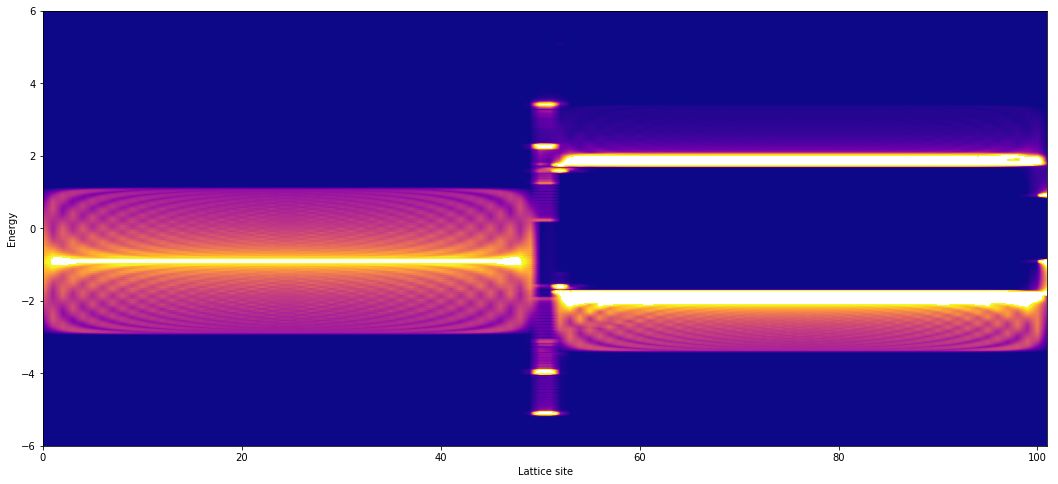

In [8]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.contourf(np.arange(ldos.shape[0]), energy_state, ldos.T, cmap=cm.plasma, levels=np.linspace(0, 100, 200))
ax.set_xlabel("Lattice site")
ax.set_ylabel("Energy")

In [9]:
print(system.eigenvalues[:,0])

[-5.08185864 -3.9174201  -3.38373121 -3.38371427 -3.37876615 -3.37869897
 -3.37051844 -3.37036952 -3.35902906 -3.3587698  -3.34435507 -3.34396089
 -3.32656933 -3.32602068 -3.30576022 -3.30504345 -3.2820311  -3.28113929
 -3.25549991 -3.25443356 -3.2262986  -3.22506618 -3.19457247 -3.19319092
 -3.16047952 -3.15897465 -3.1241897  -3.1225966  -3.08588406 -3.08424771
 -3.04575388 -3.04413027 -3.00399968 -3.00245869 -2.96083017 -2.95946456
 -2.91646111 -2.91543669 -2.89810067 -2.89809191 -2.8924245  -2.89237533
 -2.88304646 -2.88287332 -2.87158954 -2.87111405 -2.86962414 -2.86865338
 -2.8528594  -2.85268093 -2.83298109 -2.83211145 -2.82501503 -2.82422524
 -2.80822698 -2.80799759 -2.7827645  -2.78043487 -2.77839315 -2.77635717
 -2.75037987 -2.74953195 -2.73164708 -2.73147903 -2.71557838 -2.71541002
 -2.68651868 -2.68450323 -2.67820217 -2.67699691 -2.64266613 -2.63805283
 -2.63769453 -2.63422956 -2.59868947 -2.59511709 -2.59127813 -2.58910785
 -2.55327617 -2.54956003 -2.54547384 -2.54335461 -2

Text(0,0.5,'#')

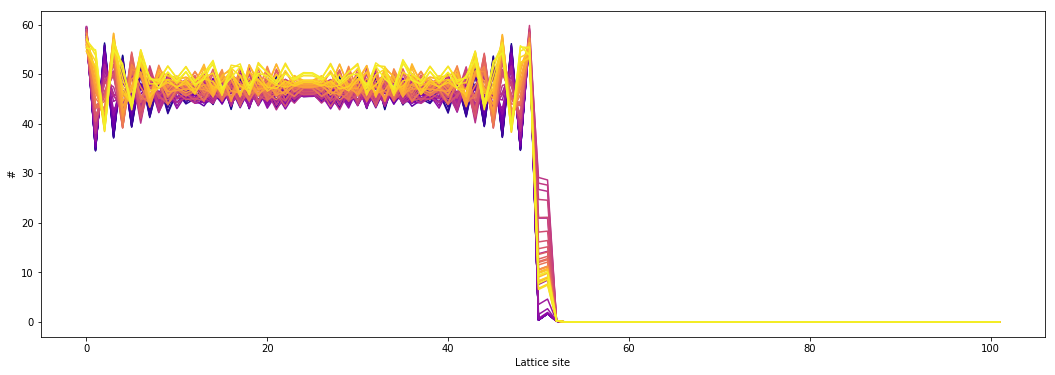

In [10]:
# Try to plot only middle energies
# Hva plottes egentlig?

fig = plt.figure(figsize=(18, 6))
num_energies = ldos.shape[1]
step = 1
delta_range = 50
start = num_energies//2
stop = min(num_energies//2+delta_range, num_energies)
for i in range(start, stop, step):
    plt.plot(ldos[:, i], c = cm.plasma(float(i-start)/(stop-start)))
plt.xlabel("Lattice site")
plt.ylabel("#")

In [11]:
Fs = np.pad(np.array([0.3], dtype=np.complex128),  (0,8), mode='constant', constant_values=0.0)
print(Fs)

[0.3+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]


In [12]:
import numpy as np
a = np.ones((5,5))
b = np.ones((5,5))

In [11]:
for i in range(len(a)):
    for j in range(len(a)):
        a[i][j] += i*2 + j
        b[j][i] += i*5+j
        
print(a)
print(b)

[[ 1.  2.  3.  4.  5.]
 [ 3.  4.  5.  6.  7.]
 [ 5.  6.  7.  8.  9.]
 [ 7.  8.  9. 10. 11.]
 [ 9. 10. 11. 12. 13.]]
[[ 1.  6. 11. 16. 21.]
 [ 2.  7. 12. 17. 22.]
 [ 3.  8. 13. 18. 23.]
 [ 4.  9. 14. 19. 24.]
 [ 5. 10. 15. 20. 25.]]


In [17]:
print(a[:,:]*b[:,:])
c = a*b
tmp1 = np.sum(a*b)
tmp = 0
for i in range(len(c)):
    for j in range(len(c[0])):
        tmp += c[i,j]
print(tmp)
print(tmp1)

[[  1.  12.  33.  64. 105.]
 [  6.  28.  60. 102. 154.]
 [ 15.  48.  91. 144. 207.]
 [ 28.  72. 126. 190. 264.]
 [ 45. 100. 165. 240. 325.]]
2625.0
2625.0


In [16]:
a1, a2 = np.where(a>= 5.0)
print(a1)
print(a2)

[1 1 2 2 2 2 3 3 3 3]
[2 3 0 1 2 3 0 1 2 3]


In [17]:
for i in range(len(a1)):
    print(a[a1[i]][a2[i]])

5.0
6.0
5.0
6.0
7.0
8.0
7.0
8.0
9.0
10.0


In [12]:
a[2:,2:]

array([[ 7.,  8.],
       [ 9., 10.]])

In [6]:
np.tanh(b[2,:])

array([0.99505475, 0.99999977, 1.        , 1.        , 1.        ])

In [15]:
np.sum(a[0,:]*b[2,:])

245.0

In [14]:
np.matmul(a[0,:],b[2,:])

245.0